4. Kaggle1_BERT_Classification
•	BERT Fine-Tuned on Data1 Toddler 


- Soo Kyung Bae(Scarlett), Ph.D. Student
- Dept. of Integrated Medicine(Major in Digital Healthcare)
- Yonsei University College of Medicine

In [1]:
## Import Data

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
pt=os.getcwd()
pt

'/home/skbae/Documents/skbae/ASD/paper/Pgm'

In [4]:
import pandas as pd
QT_ASD = pd.read_csv('../Data/QCHAT_T_ASD_total_Jan222024.csv')

In [5]:
QT_ASD.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A2_C0870532,A3_C4036288,A4_C0424091,A5_C2371970,A6_C2370875,A7_C4064035,A8_C1854882,A9_C0566243,A10_C4064319,combined
0,1,0,0,0,0,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,social interaction impairment in social/emotio...,absent speech,NaN,play impairment stares blankly at play objects...,", , , , , ,social interaction impairment in s..."
1,2,1,1,0,0,0,1,1,0,0,...,contacts eye,NaN,NaN,NaN,shifting attention,social interaction impairment in social/emotio...,NaN,NaN,NaN,"attention and concentration deficit ,contacts ..."
2,3,1,0,0,0,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,social interaction impairment in social/emotio...,absent speech,NaN,play impairment stares blankly at play objects...,"attention and concentration deficit , , , , , ..."
3,4,1,1,1,1,1,1,1,1,1,...,contacts eye,spontaneously pointing,pointing to express interest,does pretend play,shifting attention,social interaction impairment in social/emotio...,absent speech,difficulty imitating gesture,play impairment stares blankly at play objects...,"attention and concentration deficit ,contacts ..."
4,5,1,1,0,1,1,1,1,1,1,...,contacts eye,NaN,pointing to express interest,does pretend play,shifting attention,social interaction impairment in social/emotio...,absent speech,difficulty imitating gesture,play impairment stares blankly at play objects...,"attention and concentration deficit ,contacts ..."


In [6]:
QT_ASD.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits ',
       'A1_C2977673', 'A2_C0870532', 'A3_C4036288', 'A4_C0424091',
       'A5_C2371970', 'A6_C2370875', 'A7_C4064035', 'A8_C1854882',
       'A9_C0566243', 'A10_C4064319', 'combined'],
      dtype='object')

In [8]:
df=QT_ASD[['Class/ASD Traits ','combined']]

In [9]:
df.head()

,Class/ASD Traits,combined
0,No,", , , , , ,social interaction impairment in s..."
1,Yes,"attention and concentration deficit ,contacts ..."
2,Yes,"attention and concentration deficit , , , , , ..."
3,Yes,"attention and concentration deficit ,contacts ..."
4,Yes,"attention and concentration deficit ,contacts ..."


In [10]:
df.columns =['ASD_traits','text']

In [ ]:
# BERT Classification

In [44]:
# BertTokenizer , let’s build a Dataset class for our ASD dataset

In [41]:
import torch
import numpy as np
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
labels = {
        'No':0,
        'Yes':1,
          }


from torch.utils.data import Dataset

# class MyDataset(Dataset):
#     def __init__(self, data):
#         self.data = data

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, idx):
#         return self.data[idx]

class Dataset(Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['ASD_traits']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['text']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [ ]:
#split our dataframe into training, validation, and test set with the proportion of 80:10:10.

In [154]:
df.head()

,ASD_traits,text,tokenized_text
0,No,", , , , , ,social interaction impairment in s...","[input_ids, token_type_ids, attention_mask]"
1,Yes,"attention and concentration deficit ,contacts ...","[input_ids, token_type_ids, attention_mask]"
2,Yes,"attention and concentration deficit , , , , , ...","[input_ids, token_type_ids, attention_mask]"
3,Yes,"attention and concentration deficit ,contacts ...","[input_ids, token_type_ids, attention_mask]"
4,Yes,"attention and concentration deficit ,contacts ...","[input_ids, token_type_ids, attention_mask]"


In [37]:
#df out of T_ASD2
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), 
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

843 105 106


In [14]:
df_train.head()

,ASD_traits,text
260,Yes,"attention and concentration deficit ,contacts ..."
1025,No,", , , , , ,social interaction impairment in s..."
845,No,", , , , , ,social interaction impairment in s..."
1005,Yes,"attention and concentration deficit , ,spontan..."
88,Yes,"attention and concentration deficit , , , ,doe..."


In [15]:
df_train['ASD_traits'].value_counts()

Yes    579
No     264
Name: ASD_traits, dtype: int64

In [16]:
df_val['ASD_traits'].value_counts()

Yes    79
No     26
Name: ASD_traits, dtype: int64

In [17]:
df_test['ASD_traits'].value_counts()

Yes    70
No     36
Name: ASD_traits, dtype: int64

In [ ]:
# Model Building

In [42]:

from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 2) # len(labels) =2 ASD YEs or not or 5
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [ ]:
"""
BERT model outputs two variables:

The first variable, which we named _ in the code above, 
contains the embedding vectors of all of the tokens in a sequence.
The second variable, which we named pooled_output, contains the embedding vector of [CLS] token. 
For a text classification task, it is enough to use this embedding as an input for our classifier.

"""

In [204]:
df_val

,ASD_traits,text
797,No,"attention and concentration deficit , , , , , ..."
1613,No,", , , , , , , , ,"
225,Yes,", , , ,does pretend play , ,social interactio..."
26,Yes,"attention and concentration deficit ,contacts ..."
1814,Yes,", , , , , , , , ,play impairment stares blank..."
...,...,...
1722,No,", , , , , , , , ,"
1183,Yes,", , , , , , , , ,"
524,Yes,"attention and concentration deficit ,contacts ..."
1059,No,", , , , , , , , ,"


In [39]:
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import roc_auc_score, average_precision_score
import tqdm

In [43]:
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    #criterion = nn.BCEWithLogitsLoss() #binary classification
    optimizer = Adam(model.parameters(), lr= learning_rate)

  #trainer
    best_eval_auprc = 0
    best_eval_auroc = 0
    train_auprc_log = []
    eval_auprc_log = []
    train_auroc_log = []
    eval_auroc_log = []
    train_loss_log = []
    eval_loss_log = []
 
    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

        total_acc_train = 0
        total_loss_train = 0

        preds_train = []
        targets_train = []
        avg_train_loss = 0.

        for train_input, train_label in tqdm(train_dataloader):

            train_label = train_label.to(device)
            mask = train_input['attention_mask'].to(device)
            input_id = train_input['input_ids'].squeeze(1).to(device)

            output = model(input_id, mask)
                
            batch_loss = criterion(output, train_label.long())
            total_loss_train += batch_loss.item()
                
            acc = (output.argmax(dim=1) == train_label).sum().item()
            total_acc_train += acc

            model.zero_grad()
            batch_loss.backward()
            optimizer.step()

            #loss = criterion(output, test_label) #BCELoss, 
            #print(f'LOSS: {loss}')
            avg_train_loss +=   batch_loss.item() / len(train_dataloader)
            #print(f'Avg T LOSS: {avg_test_loss }')

            #probs_test = output.detach().cpu().numpy()
            probs_train  =output.argmax(dim=1)
            #print(f'Prob_T: {probs_test}')
            preds_train += list(probs_train .flatten())
            #print(f'Pred_T: {preds_test}')
            targets_train += list(train_label.detach().cpu().numpy().flatten())         
            #print(f'Target_T:{targets_test}')
        auroc_train = roc_auc_score(targets_train, preds_train) # sklearn auroc matrix 
        auprc_train = average_precision_score(targets_train, preds_train, average='micro') # sklearn auprc matrix       
    
        print('[Train]  loss: {:.3f},  auroc: {:.3f},   auprc: {:.3f}'.format(avg_train_loss, auroc_train, auprc_train))
        train_auprc_log.append(auprc_train)
        train_auroc_log.append(auroc_train)
        train_loss_log.append(avg_train_loss)
            
        # total_acc_val = 0
        # total_loss_val = 0
        total_acc_val = 0
        total_loss_val = 0
        preds_eval = []
        targets_eval = []
        avg_eval_loss = 0.
        #output_s=[]

        with torch.no_grad():

            for val_input, val_label in val_dataloader:

                val_label = val_label.to(device)
                mask = val_input['attention_mask'].to(device)
                input_id = val_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)

                batch_loss = criterion(output, val_label.long())
                total_loss_val += batch_loss.item()
                    
                acc = (output.argmax(dim=1) == val_label).sum().item()
                total_acc_val += acc

                avg_eval_loss += batch_loss.item() / len(val_dataloader)

                probs_eval  =output.argmax(dim=1)
                #print(f'Prob_T: {probs_test}')
                preds_eval += list(probs_eval .flatten())
            #print(f'Pred_T: {preds_test}')
                targets_eval += list(val_label.detach().cpu().numpy().flatten())         
            #print(f'Target_T:{targets_test}')
            auroc_eval = roc_auc_score(targets_eval, preds_eval) # sklearn auroc matrix 
            auprc_eval = average_precision_score(targets_eval, preds_eval, average='micro') # sklearn auprc matrix 

        
        print('[Valid]  loss: {:.3f},  auroc: {:.3f},   auprc: {:.3f}'.format(avg_eval_loss, auroc_eval, auprc_eval))
        eval_auprc_log.append(auprc_eval)
        eval_auroc_log.append(auroc_eval)
        eval_loss_log.append(avg_eval_loss)
        #output_s = output

        if best_eval_auprc < auprc_eval:
            best_eval_loss = avg_eval_loss
            best_eval_auroc = auroc_eval
            best_eval_auprc = auprc_eval
                    
            # torch.save({'model_state_dict': model.state_dict(),
            #     'optimizer_state_dict': optimizer.state_dict(),
            #     'loss': best_eval_loss,
            #     'auroc': best_eval_auroc,
            #     'auprc': best_eval_auprc,
            #     'epochs': n_epoch}, best_eval_path)

            # print('Model parameter saved at epoch {}'.format(n_epoch))
        
        print('Training End!')
        print('Best eval auprc ', best_eval_auprc)
        print('Best eval auroc', best_eval_auroc)
        print(
            f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
            | Train Accuracy: {total_acc_train / len(train_data): .3f} \
            | Val Loss: {total_loss_val / len(val_data): .3f} \
            | Val Accuracy: {total_acc_val / len(val_data): .3f}')
        print(best_eval_loss, best_eval_auroc)

    return best_eval_auprc, best_eval_loss, best_eval_auroc, eval_auprc_log, eval_auroc_log, eval_loss_log


# EPOCHS = 5
# model = BertClassifier()
# LR = 1e-6
              
# train(model, df_train, df_val, LR, EPOCHS)

In [44]:
EPOCHS = 5
model = BertClassifier()
LR = 1e-6
              
best_eval_auprc,best_eval_loss, best_eval_auroc, eval_auprc_log, eval_auroc_log, eval_loss_log=train(model, df_train, df_val, LR, EPOCHS)

100%|██████████| 422/422 [11:49<00:00,  1.68s/it]


[Train]  loss: 0.514,  auroc: 0.767,   auprc: 0.845
[Valid]  loss: 0.402,  auroc: 0.924,   auprc: 0.959
Training End!
Best eval auprc  0.959310292132542
Best eval auroc 0.9238072054527751
Epochs: 1 | Train Loss:  0.257             | Train Accuracy:  0.708             | Val Loss:  0.203             | Val Accuracy:  0.905
0.4015401001527624 0.9238072054527751


100%|██████████| 422/422 [11:22<00:00,  1.62s/it]


[Train]  loss: 0.322,  auroc: 0.935,   auprc: 0.953
[Valid]  loss: 0.195,  auroc: 1.000,   auprc: 1.000
Training End!
Best eval auprc  1.0
Best eval auroc 1.0
Epochs: 2 | Train Loss:  0.161             | Train Accuracy:  0.931             | Val Loss:  0.098             | Val Accuracy:  1.000
0.19486989882194772 1.0


100%|██████████| 422/422 [10:55<00:00,  1.55s/it]


[Train]  loss: 0.151,  auroc: 0.971,   auprc: 0.977
[Valid]  loss: 0.054,  auroc: 1.000,   auprc: 1.000
Training End!
Best eval auprc  1.0
Best eval auroc 1.0
Epochs: 3 | Train Loss:  0.075             | Train Accuracy:  0.973             | Val Loss:  0.027             | Val Accuracy:  1.000
0.19486989882194772 1.0


100%|██████████| 422/422 [10:56<00:00,  1.56s/it]


[Train]  loss: 0.041,  auroc: 0.999,   auprc: 0.999
[Valid]  loss: 0.023,  auroc: 1.000,   auprc: 1.000
Training End!
Best eval auprc  1.0
Best eval auroc 1.0
Epochs: 4 | Train Loss:  0.021             | Train Accuracy:  0.999             | Val Loss:  0.012             | Val Accuracy:  1.000
0.19486989882194772 1.0


100%|██████████| 422/422 [10:58<00:00,  1.56s/it]


[Train]  loss: 0.052,  auroc: 0.984,   auprc: 0.986
[Valid]  loss: 0.016,  auroc: 1.000,   auprc: 1.000
Training End!
Best eval auprc  1.0
Best eval auroc 1.0
Epochs: 5 | Train Loss:  0.026             | Train Accuracy:  0.988             | Val Loss:  0.008             | Val Accuracy:  1.000
0.19486989882194772 1.0


In [ ]:
#os.makedirs('./BERT', exist_ok=True)

In [55]:

# Save the model
# Save the model
torch.save(model.state_dict(), './BERT/Bert_qchatmodel_Feb2024_model.pth')

In [54]:
model.load_state_dict(torch.load('./BERT/Bert_qchatmodel_Feb2024_model.pth')

In [46]:
print('Training End!') # eval_auprc_log
print('Best eval auprc ', best_eval_auprc) #eval_auprc_log
print('Best eval auroc', best_eval_auroc) # eval_auroc_log
print('Best eval loss', best_eval_loss)

Training End!
Best eval auprc  1.0
Best eval auroc 1.0
Best eval loss 0.19486989882194772


In [ ]:
#Evaluate Model on Test Data

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import seaborn as sns

In [48]:
# Libraries

import matplotlib.pyplot as plt
import pandas as pd
import torch

# Preliminaries

#from torchtext.data import Field, TabularDataset, BucketIterator, Iterator

# Models

import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification

# Training

import torch.optim as optim

# Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

f1: 1.0
1.0
Test Accuracy:  1.000
1.0 1.0 1.0


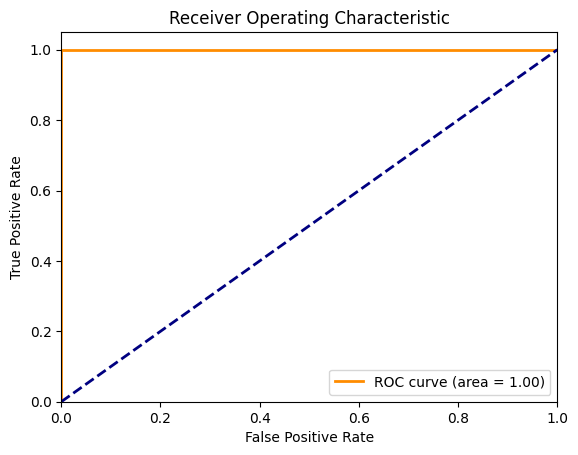

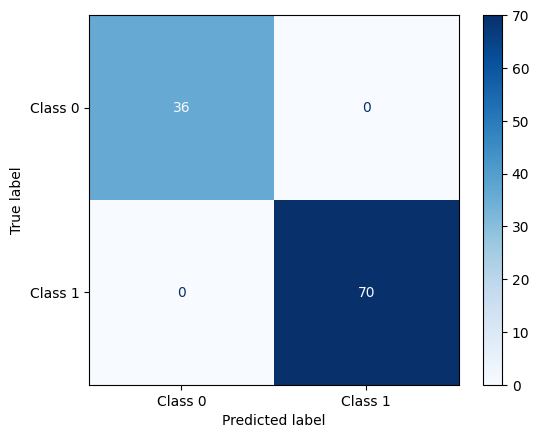

In [49]:
criterion = nn.CrossEntropyLoss() 
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    preds_test = []
    targets_test = []
    avg_test_loss = 0.
    
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

            test_label = test_label.to(device)
            #print(f'test_label: {test_label}')
            mask = test_input['attention_mask'].to(device)
            input_id = test_input['input_ids'].squeeze(1).to(device)

            output = model(input_id, mask)
            #print(f'output : { output }')
            #print(f'output.argmax(dim=1) : { output.argmax(dim=1) }')
            acc = (output.argmax(dim=1) == test_label).sum().item()
            total_acc_test += acc

            loss = criterion(output, test_label) #BCELoss, 
            #print(f'LOSS: {loss}')
            avg_test_loss +=   loss.item() / len(test_dataloader)
            #print(f'Avg T LOSS: {avg_test_loss }')

            #probs_test = output.detach().cpu().numpy()
            probs_test =output.argmax(dim=1)
            #print(f'Prob_T: {probs_test}')
            preds_test += list(probs_test.flatten())
            #print(f'Pred_T: {preds_test}')
            targets_test += list(test_label.detach().cpu().numpy().flatten())         
            #print(f'Target_T:{targets_test}')

        precision, recall, f1, _ = precision_recall_fscore_support(targets_test, preds_test, average='binary')
        acc = accuracy_score(targets_test, preds_test)
        print(f'f1: {f1}')
        #pr_curve = PrecisionRecallCurve(num_classes=2)
        #precision, recall, thresholds = pr_curve(preds_test, targets_test)
        auroc_test = roc_auc_score(targets_test, preds_test)
        print(auroc_test )
        #print(targets_test, preds_test)
        #auprc_test = average_precision_score(targets_test, preds_test, average='micro')   
        #print(auprc_test)
    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    print( precision, recall,  f1 )


        # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(targets_test, preds_test)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Compute confusion matrix
    cm = confusion_matrix(targets_test, preds_test)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# evaluate(model, df_test)
    
evaluate(model, df_test)

In [56]:
import matplotlib.pyplot as plt

In [57]:
x = np.arange(0,5) #config.n_epoch : 50

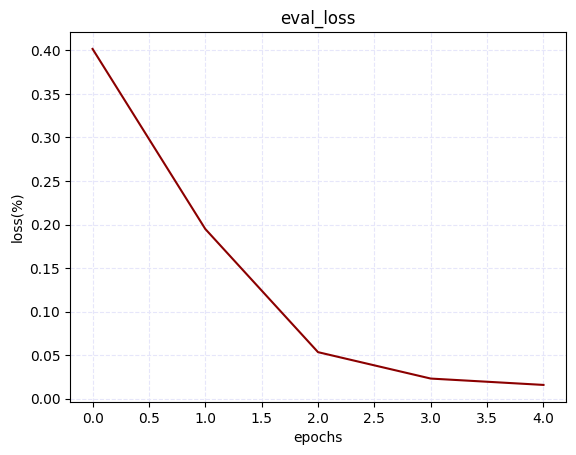

In [58]:
    # 도화지 생성
    fig = plt.figure()
    # 정확도 그래프 그리기
    plt.plot(x,eval_loss_log, label='eval_loss', color='darkred')
     # 축 이름
    plt.xlabel('epochs')
    plt.ylabel('loss(%)')
    plt.title('eval_loss')
    plt.grid(linestyle='--', color='lavender')
     # 그래프 표시
    plt.show()

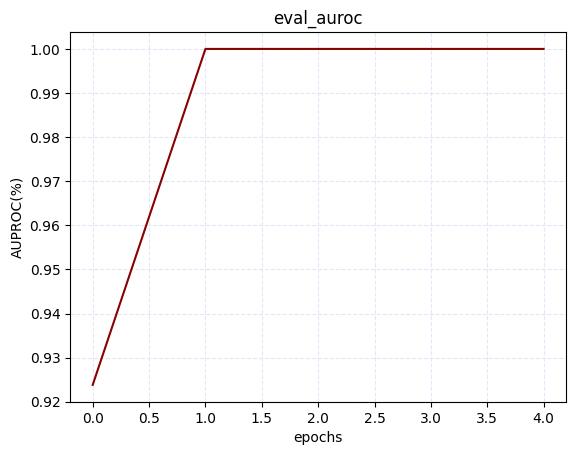

In [59]:
# 도화지 생성
fig = plt.figure()
plt.plot(x, eval_auroc_log, label='eval_auroc', color='darkred')
# 축 이름
plt.xlabel('epochs')
plt.ylabel('AUPROC(%)')
plt.title('eval_auroc')
plt.grid(linestyle='--', color='lavender')
# 그래프 표시
plt.show()

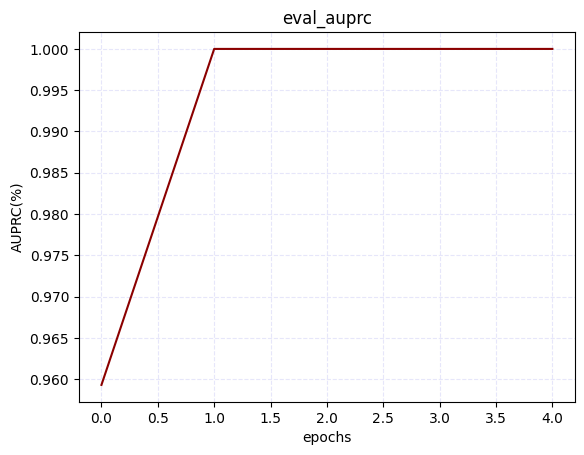

In [60]:
# 도화지 생성
fig = plt.figure()
plt.plot(x, eval_auprc_log, label='eval_auprc', color='darkred')
# 축 이름
plt.xlabel('epochs')
plt.ylabel('AUPRC(%)')
plt.title('eval_auprc')
plt.grid(linestyle='--', color='lavender')
# 그래프 표시
plt.show()